# Making slice plots (Beginner)

### Import packages

In [1]:
%load_ext autoreload  
%autoreload 2

In [2]:
import numpy                          as np
import matplotlib.pyplot              as plt
import os

# importing plons modules
import plons
import plons.SmoothingKernelScript    as sk
import plons.ConversionFactors_cgs    as cgs
import plons.Plotting                 as plot

### Setting information about data

In [3]:
prefix = "wind"
loc = "Model"
dumpnumber = 600
dump = os.path.join(loc, f"{prefix}_{dumpnumber:06d}")

### Retrieving the data

Creating the directory to store the models

In [4]:
!mkdir -p $loc

Downloading the data

In [5]:
%%capture
if not os.path.exists(dump):
    !wget "https://github.com/Ensor-code/phantom-models/raw/refs/heads/main/Esseldeurs+2023/BinaryHighLucy/wind_00600?download=" --output-document $dump
infile = os.path.join(loc, f"{prefix}.in")
if not os.path.exists(infile):
    !wget "https://raw.githubusercontent.com/Ensor-code/phantom-models/refs/heads/main/Esseldeurs%2B2023/BinaryHighLucy/wind.in" --output-document $infile
setupfile = os.path.join(loc, f"{prefix}.setup")
if not os.path.exists(setupfile):
    !wget "https://raw.githubusercontent.com/Ensor-code/phantom-models/refs/heads/main/Esseldeurs%2B2023/BinaryHighLucy/wind.setup" --output-document $setupfile

### Loading setup and dump

In [6]:
setup     = plons.LoadSetup(loc, prefix)

In [7]:
dumpData  = plons.LoadFullDump(dump, setup)

### Plotting density in the orbital plane

#### Plotting around the CoM

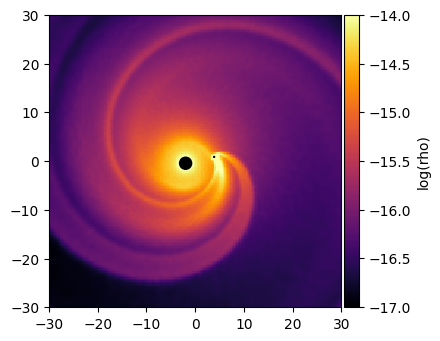

In [8]:
fig, ax = plt.subplots(1, figsize=(4, 4))
cbar = plot.SlicePlot2D(ax, dumpData, setup, xlim=(-30, 30), ylim=(-30, 30))

#### Plotting around the companion

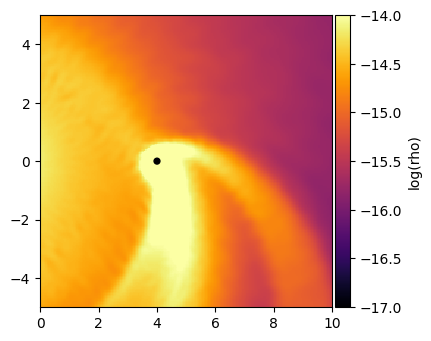

In [9]:
fig, ax = plt.subplots(1, figsize=(4, 4))
cbar = plot.SlicePlot2D(ax, dumpData, setup, xlim=(0, 10), ylim=(-5, 5), rotate=True)

### Making your own plane on which to smooth (as a meshgrid)

In [10]:
n = 200
x = np.linspace(-30, 30, n)*cgs.au
y = np.linspace(-30, 30, n)*cgs.au
X, Y = np.meshgrid(x, y)
Z    = np.zeros_like(X)

#### Smoothing the data on the plane

In [11]:
smooth = sk.smoothMesh(X, Y, Z, dumpData, ['rho'])

#### Plotting the plane

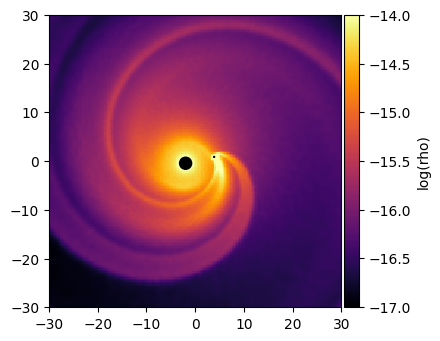

In [12]:
fig, ax = plt.subplots(1, figsize=(4, 4))
plot.plotSlice(ax, X, Y, smooth, 'rho', logplot=True, cmap = plt.colormaps['inferno'], clim=(-17, -14))
cAGB, cComp = plot.plotSink(ax, dumpData, setup)

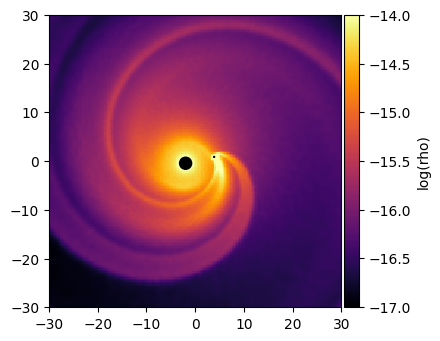

In [13]:
fig, ax = plt.subplots(1, figsize=(4, 4))
plot.plotSlice(ax, X, Y, smooth, 'rho', logplot=True, cmap = plt.colormaps['inferno'], clim=(-17, -14))
cAGB, cComp = plot.plotSink(ax, dumpData, setup)